###### 5_Logistic_Regression.ipynb

## 로지스틱 회귀 (Logistic Regression)
- 로지스틱 회귀는 선형 모델을 기반으로, 예측 결과를 확률로 변환하여 분류를 수행하는 알고리즘
- 선형 회귀의 결과를 시그모이드 함수에 통과시켜 확률 값으로 변환
  - 예측값이 0 또는 1과 같이 이산적인 범주형 값일 때 사용 (ex. 합격/불합격, 스팸/정상, 등등)

In [8]:
import numpy as np

# 입력 데이터 (시험 점수)
x = np.array([[10], [20], [30], [40]
              , [50], [60], [70], [80], [90]])
# 목표 데이터 (합격 여부, 0: 불합격, 1: 합격)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1])

print(f'x: {x.reshape(-1)}')
print(f'y: {y}')

x: [10 20 30 40 50 60 70 80 90]
y: [0 0 0 0 1 1 1 1 1]


([<matplotlib.axis.YTick at 0x2700e238e90>,
 [Text(0, 0, '0'), Text(0, 1, '1')])

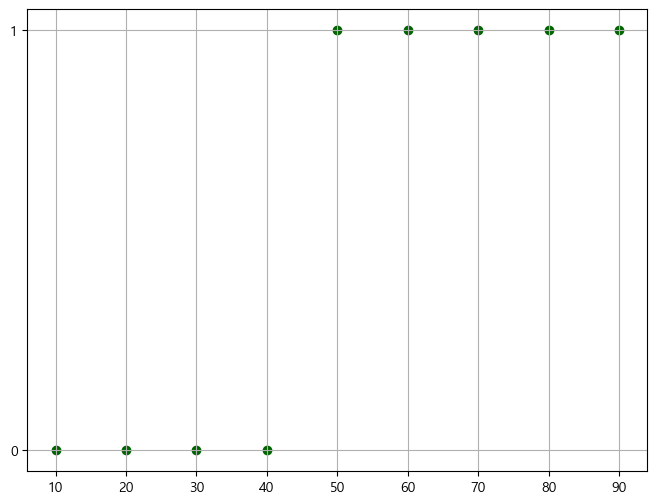

In [9]:
# 샘플 데이터 시각화 (산점도)
import matplotlib.pyplot as plt

# 한글 폰트, 마이너스 기호 깨짐 방지
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(8,6))

# x축 : 점수(입력데이터), y축 : 합격 여부(목표데이터. 0 또는 1)
plt.scatter(x, y, color='darkgreen')
plt.grid(True)
plt.yticks([0, 1])    # y축 눈금 설정( 0, 1 )

In [10]:
# LogisticRegression 모델
from sklearn.linear_model import LogisticRegression

# 모델 생성
model = LogisticRegression()

# 학습 
model.fit(x, y)
# * 회귀계수(기울기), 절편 확인
print(f'기울기 : {model.coef_[0,0]:.2f}')
print(f'절편 : {model.intercept_[0]:.2f}')

기울기 : 0.57
절편 : -25.44


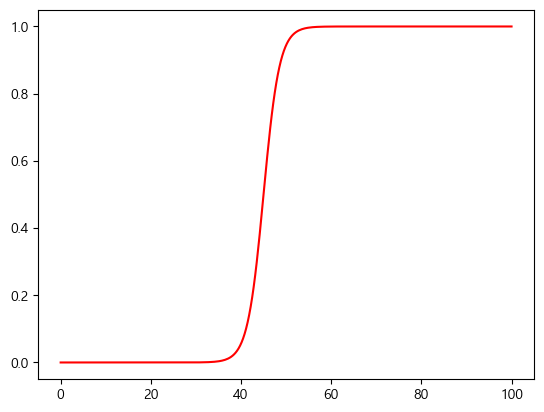

In [11]:
# 테스트용 데이터
# => 0부터 100까지 300개 나누어서 생성
x_test = np.linspace(0, 100, 300).reshape(-1, 1)

y_proba = model.predict_proba(x_test)
# predict_proba : 입력데이터(점수)에 대한 클래스별 확률을 반환
# y_proba
# [불합격확률, 합격확률]
y_proba = y_proba[:, 1]     # 합격일 확률만 선택

# 예측된 합격 확률 시각화 (시그모이드 곡선)
plt.plot(x_test, y_proba, color='red')

In [12]:
x_test = np.array([[45], [55], [100]])
y_pred = model.predict(x_test)
y_proba = model.predict_proba(x_test)
for x, pred, proba in zip(x_test, y_pred, y_proba):
  # zip() => [(45, 45예측값, 확률), (55, 55예측값, 확률), (100, 100예측값, 확률)]
  print(f'점수: {x} , 예측결과: {pred}, 확률: {proba}')

점수: [45] , 예측결과: 1, 확률: [0.49998162 0.50001838]
점수: [55] , 예측결과: 1, 확률: [0.00349405 0.99650595]
점수: [100] , 예측결과: 1, 확률: [3.13082893e-14 1.00000000e+00]


---

In [13]:
# 붓꽃(iris) 데이터셋
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
df = iris.frame   # 데이터셋 => feature + target
# df.head()

x = df.drop(columns='target')   # 독립변수. DataFrame. 2D
y = df['target']                # 종속변수. Series. 1D

In [14]:
# 훈련용, 테스트(검증)용 데이터 분리
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_train.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,120.000000,120.000000,120.000000,120.000000
mean,5.809167,3.061667,3.726667,1.183333
std,0.823805,0.449123,1.752345,0.752289
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.500000,0.300000
50%,5.750000,3.000000,4.250000,1.300000
75%,6.400000,3.400000,5.100000,1.800000
max,7.700000,4.400000,6.700000,2.500000


In [15]:
# 로지스틱 회귀의 경우 경사 하강법을 사용하여 최적의 가중치를 찾음
# => 스케일링 작업을 보통은 해줌
# - 표준 스케일링 적용 시 모든 특징(Feature)이 평균 0, 표준편차 1을 가지게 되어, 경사 하강법의 수렴 속도를 높여 학습이 안정적으로 이루어짐

# * 경사 하강법 : 오차를 최소화하는 방향으로 모델의 매개변수(가중치, 편향)를 조금씩 반복적으로 조정해 나가는 방법

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_s = scaler.fit_transform(x_train)     # 훈련 데이터 스케일링
x_test_s = scaler.transform(x_test)           # 테스트 데이터 스케일링

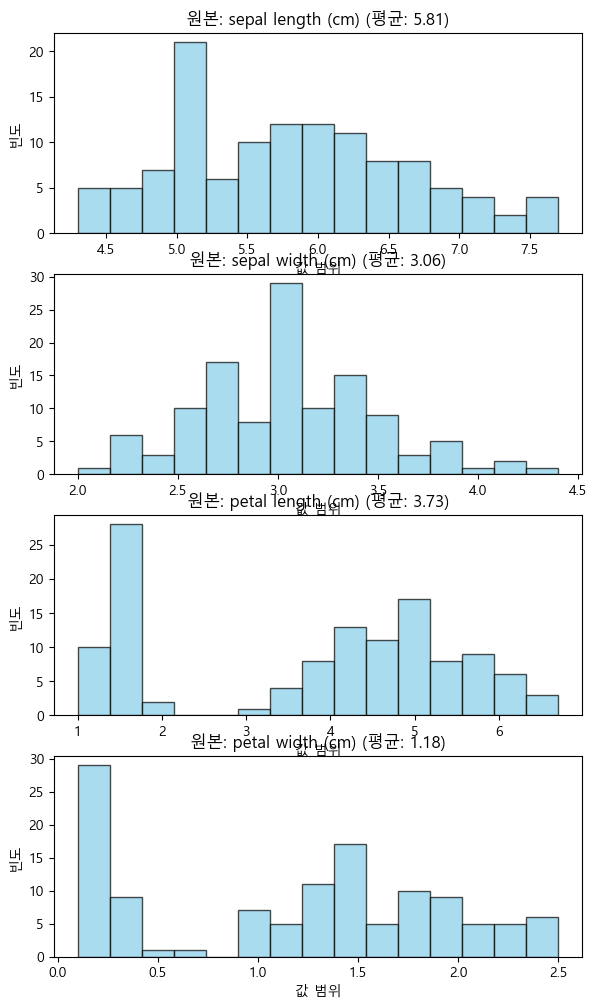

In [22]:
# 스케일링 전/후 시각화 비교
feature_names = x.columns         # Feature 이름 목록
n_features = len(feature_names)   # Feature 개수 (x.shape[1])

plt.figure(figsize=(15, 12)) 
# 4x2 서브플롯 사용
for i in range(n_features):     # i: 0 ~ 3
  # 서브 플롯 지정
  plt.subplot(4, 2, i*2 + 1)
  # 1, 3, 5, 7 -> 패턴 i

  plt.hist(x_train.iloc[:, i], color='skyblue', edgecolor='black', alpha=0.7, bins=15)
  plt.title(f'원본: {feature_names[i]} (평균: {x_train.iloc[:, i].mean():.2f})')
  plt.xlabel('값 범위')
  plt.ylabel('빈도')